In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
from tensorflow import keras 

In [4]:
from tensorflow.keras import layers

In [5]:
 tf.__version__
 

'2.5.0'

In [6]:
 keras.__version__
 

'2.5.0'

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

    Dataset is already split in training and testing data.
    Since there is no validation set we created one.
    Also, we have scaled the pixels to the range (0-1) // Dividing By 255  

In [10]:
y_train[0]

4

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential(
    [
        layers.Flatten(input_shape=[28, 28]),
        layers.Dense(300, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

    h(W, b)(X) = ϕ(XW + b)
    X represents the matrix of input features
    weight matrix W contains all the connection weights
    bias vector b contains all the connection weights between the bias neuron and the artificial neurons.  
    function ϕ is called the activation function

    we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each
    input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 1). This layer does
    not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer
    in the model, you should specify the input_shape, which doesn’t include the batch size, only the shape
    of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer, setting
    input_shape=[28,28].

    Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense
    layer manages its own weight matrix, containing all the connection weights between the neurons and their
    inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it
    computes the above Equation. 

    Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.

    Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation
    function (because the classes are exclusive).

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [16]:
model.layers

In [17]:
 hidden1 = model.layers[1]

In [18]:
weights, biases = hidden1.get_weights()
print(weights, biases)

[[ 0.03352723  0.03548772 -0.03675329 ...  0.0092849   0.04009782
  -0.07305712]
 [-0.07180454 -0.00829654 -0.05545541 ... -0.05238726 -0.06290152
   0.01624177]
 [ 0.03892022  0.05444615  0.03350551 ... -0.06076308  0.05503288
   0.01254912]
 ...
 [ 0.02059278  0.05819765  0.02254591 ... -0.02309689 -0.01409994
  -0.02522065]
 [-0.04034633  0.03316374 -0.02690304 ...  0.00358569  0.04798219
  -0.0303837 ]
 [-0.01664465 -0.06039213 -0.04330245 ... -0.0718682   0.0077248
   0.02397493]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [19]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [22]:
 history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7068 - accuracy: 0.7673 - val_loss: 0.5002 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4874 - accuracy: 0.8289 - val_loss: 0.4421 - val_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4426 - accuracy: 0.8453 - val_loss: 0.4137 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4161 - accuracy: 0.8539 - val_loss: 0.3939 - val_accuracy: 0.8694
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3961 - accuracy: 0.8600 - val_loss: 0.3892 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3797 - accuracy: 0.8666 - val_loss: 0.3725 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3655 - accuracy: 0.8706 - val_loss: 0.3727 - val_accuracy:

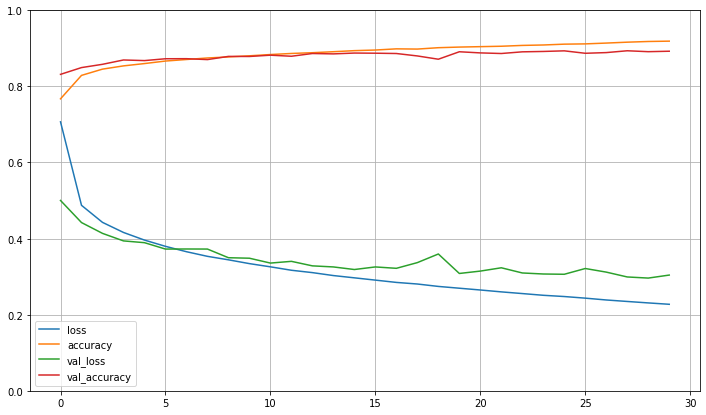

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 54.7000 - accuracy: 0.8656


[54.70003128051758, 0.8655999898910522]

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

C:\Users\Srikanth Nayak\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
y_new = y_test[:3]
for i in y_new:
    print(class_names[i])

Ankle boot
Pullover
Trouser
